In [15]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as im
from skimage import data, io, transform
from scipy import signal

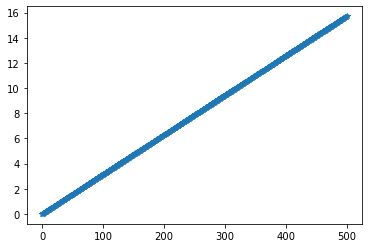

In [16]:
x = np.linspace(0, 5*np.pi, 500)
plt.plot(x,"*-")

Text(0.5, 1.0, 'Kartenzianska sustava hodnot vektora Y')

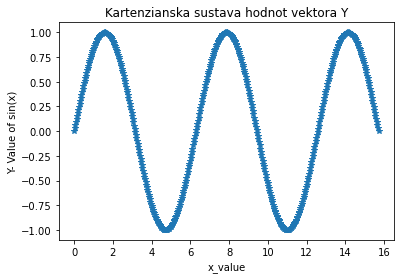

In [17]:
plt.figure()
y = np.sin(x)
plt.plot(x, y,"*-")
plt.ylabel("Y- Value of sin(x)")
plt.xlabel("x_value")
plt.title('Kartenzianska sustava hodnot vektora Y')

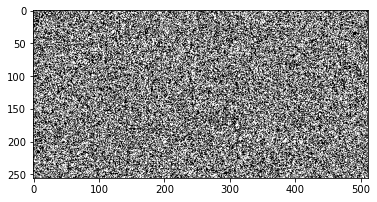

In [18]:
plt.figure()
rand_img = np.random.rand(256, 512)
plt.imshow(rand_img>0.5,cmap='gray')

Text(0.5, 1.0, 'Lena in RGB')

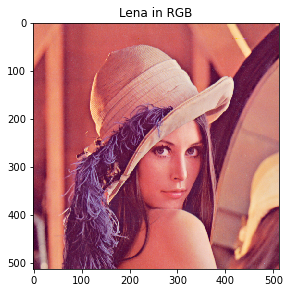

In [19]:
image = im.imread("./imgs/lena.png")
fig, ax = plt.subplots()
io.imshow(image) # Preco toto funguje.
plt.title('Lena in RGB')

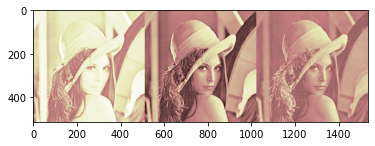

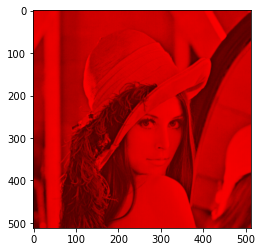

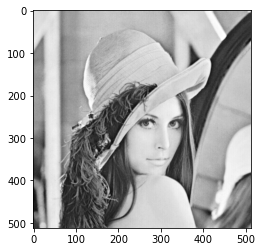

In [20]:
plt.figure()
plt.imshow(np.concatenate((image[:,:,0], image[:,:,1], image[:,:,2]),1),cmap='pink')
image_R = np.array(image)
image_R[:,:,1:] = 0
plt.figure()
plt.imshow(image_R)
plt.figure()
img = image_R[:,:,0].astype(dtype=np.uint8)
plt.imshow(image[:,:,0],cmap='gray')

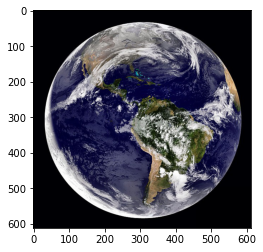

In [21]:
image_earth = im.imread("imgs/earth.jpg")
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(image_earth)
ax.set_aspect('equal')

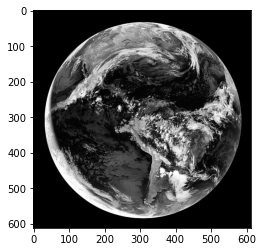

In [22]:
image_earth = im.imread("imgs/earth.jpg")
i_gray = 0.2126 * image_earth[:,:,0] + 0.7152 * image_earth[:,:,1] + 0.0722 * image_earth[:,:,2]
i_gray = i_gray.astype(dtype=np.uint8)
plt.figure()
plt.imshow(i_gray, cmap='gray')

Sum error between methods:  3853
Average error:  0.01028717587252766


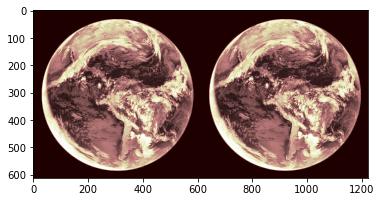

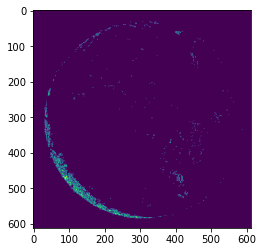

In [23]:
from skimage.color import rgb2gray
#Y = 0.2125 R + 0.7154 G + 0.0721 B scikit
i_gray2 = (rgb2gray(image_earth)*255).astype(dtype=np.uint8)
print("Sum error between methods: ", np.sum((i_gray2 -i_gray)**2))
print("Average error: ", np.sum((i_gray2 -i_gray)**2)/i_gray2.size)

plt.figure()
plt.imshow(np.concatenate((i_gray, i_gray2),1),cmap='pink')
plt.figure()
plt.imshow(i_gray-i_gray2)

Sum error between methods:  287.52932208141874
Average error:  0.0007676783557643928


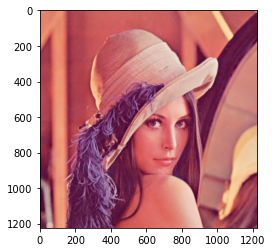

In [24]:
I_resized = transform.resize(image, np.array(i_gray.shape)*2,order=1)
I_resized2 = transform.resize(image, np.array(i_gray.shape)*2, order=5)
print("Sum error between methods: ", np.sum((I_resized -I_resized2)**2))
print("Average error: ", np.sum((I_resized -I_resized2)**2)/i_gray2.size)

plt.figure()
plt.imshow(I_resized)

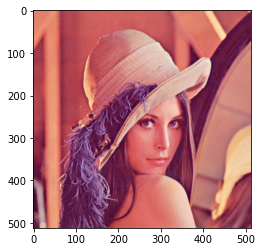

In [25]:
I_rotated = transform.rotate(image,360,resize=True)
plt.figure()
plt.imshow(I_rotated)

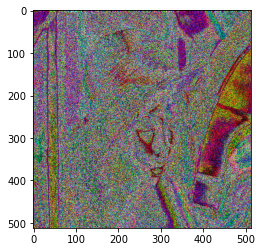

In [26]:
plt.figure()
plt.imshow(image**2)

Text(0.5, 1.0, 'Convolved image')

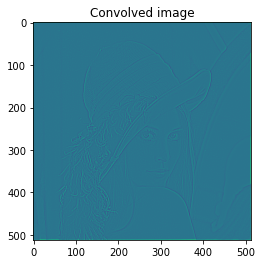

In [27]:
plt.figure()
g = np.array(np.array([[1, 2, 1]]) * np.array([[1], [2], [1]]) / 16)
plt.imshow(signal.convolve2d(rgb2gray(image),g))
conv_img = signal.convolve2d(rgb2gray(image),g,'same')
plt.imshow(rgb2gray(image)-conv_img)
plt.title('Convolved image')

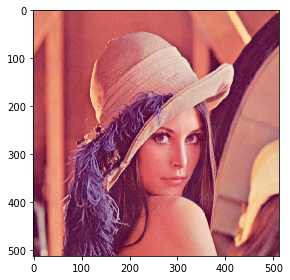

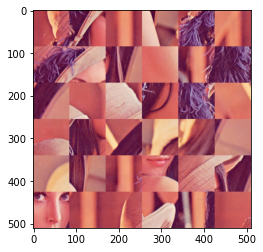

In [28]:
img = im.imread("imgs/lena.png")
io.imshow(img)

width = img.shape[1]
height = img.shape[0]
pieces = 6
newWidth = width // pieces
newHeight = height // pieces
sliced = []
x, y = 0, 0
for i in range(0, pieces):
   for j in range(0, pieces):
       sliced.append(img[x:(newWidth + x), y:(newHeight + y), :])
       y = y + int(newHeight)
   x = x + int(newWidth)
   y = 0
   
np.random.shuffle(sliced)

shuffled = np.array_split(sliced, pieces, axis = 0)

for i in range(pieces):
    shuffled[i] = np.concatenate(shuffled[i], axis = 0)
final = np.concatenate(([*shuffled]), axis = 1)

plt.figure()
plt.imshow(final)
